In [1]:
%matplotlib notebook

In [2]:
# https://stackoverflow.com/questions/37327308/add-alpha-to-an-existing-matplotlib-colormap
# https://medium.com/@pnpsegonne/animating-a-3d-scatterplot-with-matplotlib-ca4b676d4b55
# https://www.complex-systems.com/abstracts/v01_i03_a01/

# Programming the Games of Life 4555 and Life 5766

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap

BOARD_SIZE = (20, 20, 20)

cmap = pl.cm.binary
my_cmap = cmap(np.arange(cmap.N))
my_cmap[:,-1] = np.linspace(0, 1, cmap.N)
my_cmap = ListedColormap(my_cmap)

In [4]:
def check_saturation_3d(board):
    
    board_saturation = np.zeros_like(board)
    
    x, y, z = board.shape
    
    for (i, j, k) in ([(i, j, k) for i in [-1, 0, 1] for j in [-1, 0, 1] for k in [-1, 0, 1] if (i or j or k) != 0]):
        board_saturation[max(0, -i):min(x, x-i), max(0, -j):min(y, y-j), max(0, -k):min(z, z-k)] += \
        board[max(0, i):min(x, x+i), max(0, j):min(y, y+j), max(0, k):min(z, z+k)]
        
    return board_saturation

In [5]:
def game_of_life(board, b_thres=(5, 7), s_thres=(6, 6)):
    
    board_saturation = check_saturation_3d(board)
    
    survived = np.logical_and(check_saturation_3d(cube) >= s_thres[0], check_saturation_3d(cube) <= s_thres[1])
    born = np.logical_and(check_saturation_3d(cube) >= b_thres[0], check_saturation_3d(cube) <= b_thres[1])
    
    new_board_survived = np.logical_and(board, survived)
    new_board_born = np.logical_or(new_board_survived, born)
    new_board = new_board_born.astype(int)
        
    return new_board

In [6]:
# def check_survival_2d(board_2d):
#     board_saturation = np.zeros_like(board_2d)
    
#     [-1, 0, 1], []
#     board_saturation[:-1, :-1] += board_2d[1:, 1:]

In [7]:
init_p = 0.1

def animate_game_of_life(iteration, board, scatter):
    
    if iteration == 0:
#         board[:] = np.random.randint(0, 2, (20, 20, 20))
        board[:] = np.random.choice([0, 1], size=BOARD_SIZE, p=(1-init_p, init_p))
  
    else:
#     a, b, c = [np.random.randint(20) for i in range(3)]
#     board[a, b, c] = True
        board[:] = game_of_life(board)
    
    scatter.set_array(board.flatten())        
    return scatter

<IPython.core.display.Javascript object>


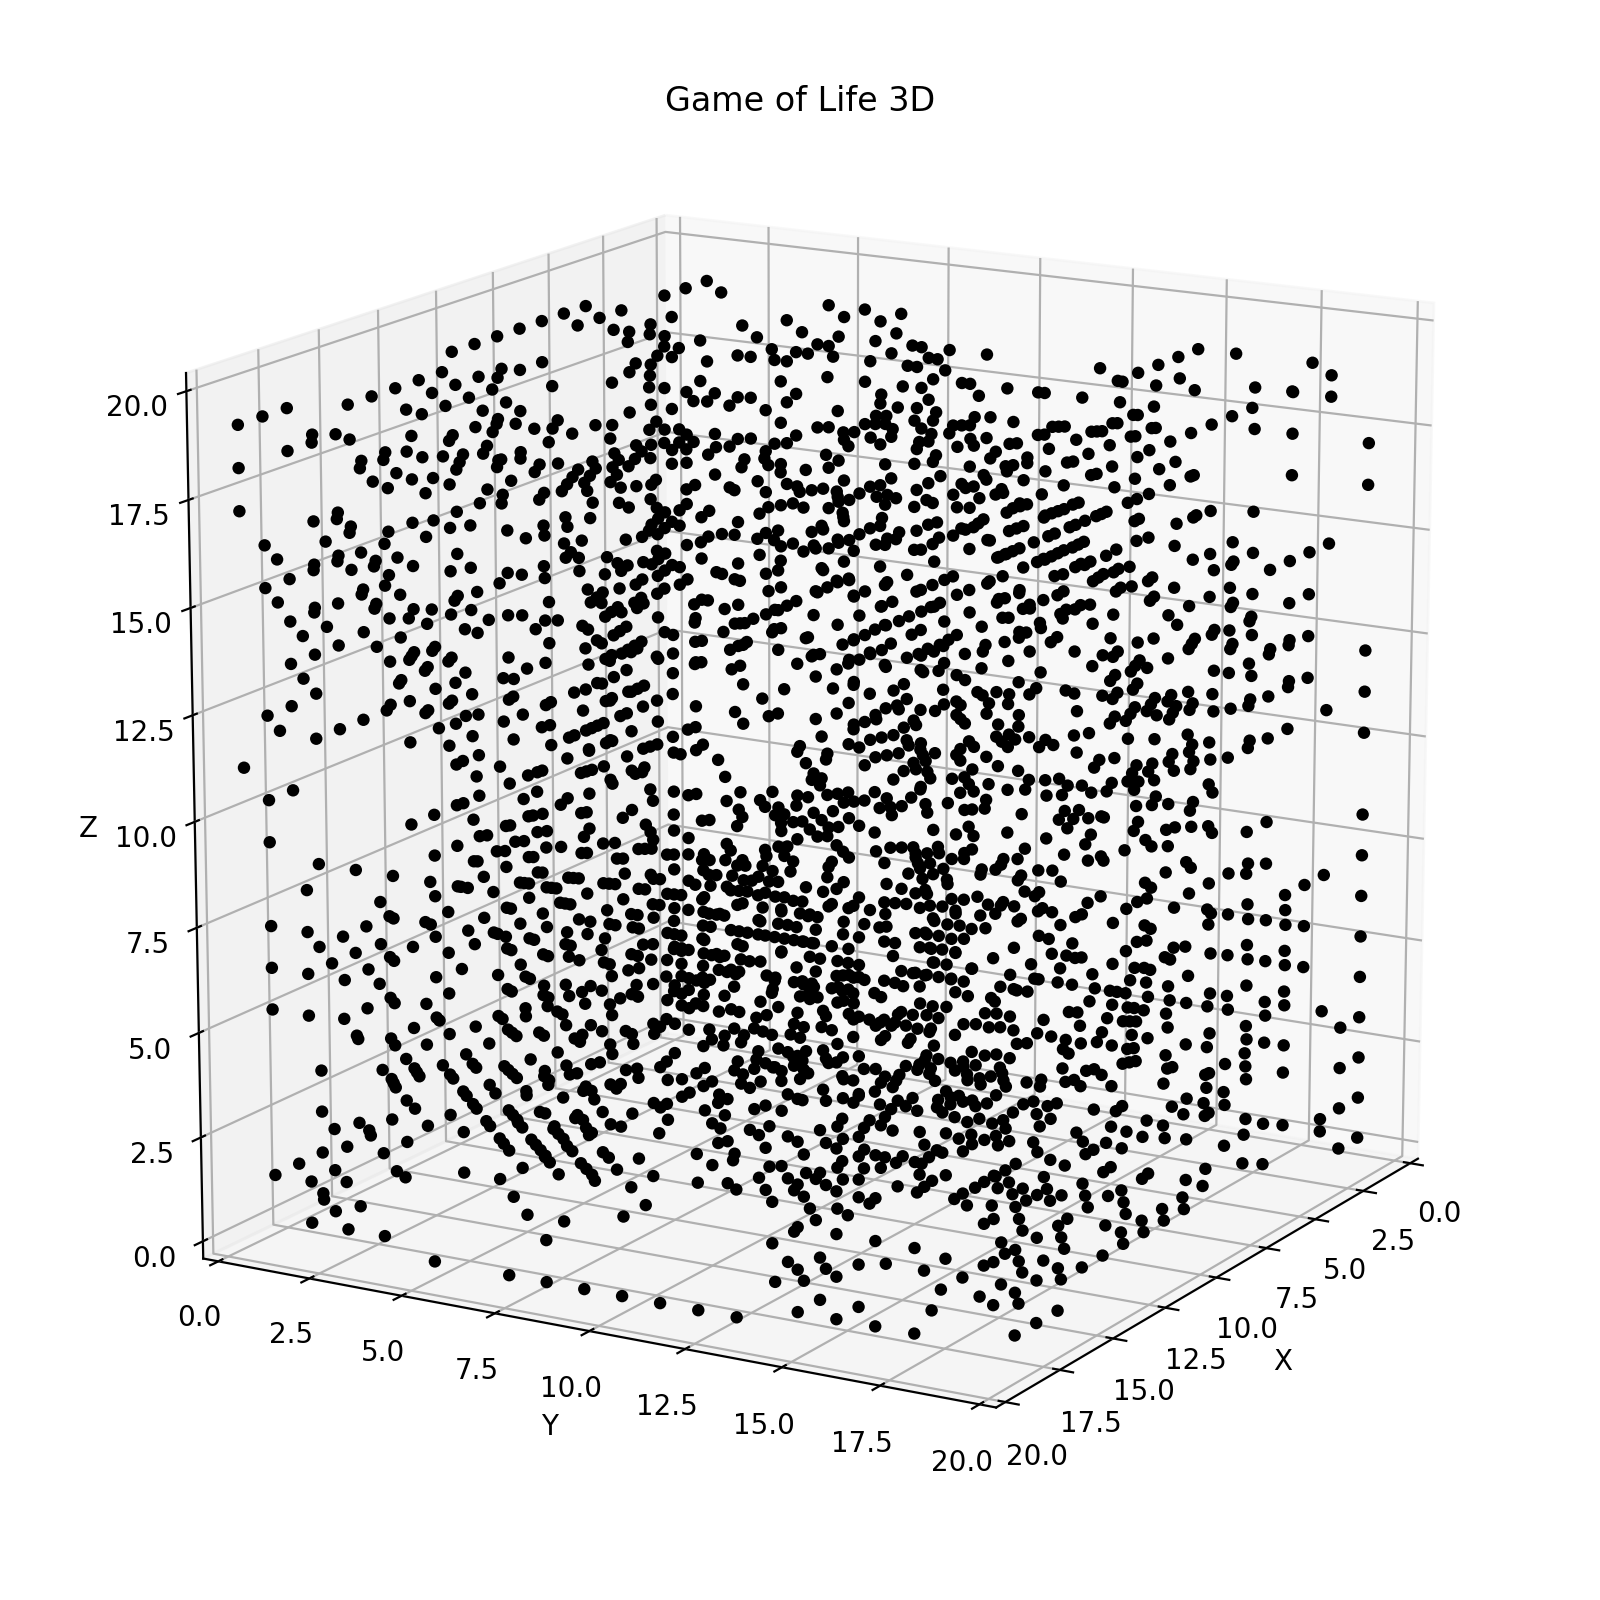

In [8]:
X, Y, Z = np.mgrid[0:BOARD_SIZE[0], 0:BOARD_SIZE[1], 0:BOARD_SIZE[2]]

cube = np.zeros(BOARD_SIZE)

# Attaching 3D axis to the figure
fig = plt.figure(figsize=(8, 8))
ax = p3.Axes3D(fig)

# Initialize scatters
scatter = ax.scatter(X, Y, Z, c=cube.flatten(), cmap=my_cmap, vmin=0, vmax=1)

# Number of iterations
iterations = 120

# Setting the axes properties
ax.set_xlim3d([0, len(X)])
ax.set_xlabel('X')

ax.set_ylim3d([0, len(Y)])
ax.set_ylabel('Y')

ax.set_zlim3d([0, len(Z)])
ax.set_zlabel('Z')

ax.set_title('Game of Life 3D')

# Provide starting angle for the view.
ax.view_init(15, 30)

ani = animation.FuncAnimation(fig, animate_game_of_life, iterations, fargs=(cube, scatter),
                                   interval=200, blit=False, repeat=True)

# fig.colorbar(scatter, shrink=0.5, aspect=5)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Joowhan Song'), bitrate=1800, extra_args=['-vcodec', 'libx264'])
ani.save('game-of-life-3d.mp4', writer=writer)

plt.show()
